In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Business Case:   
- To Predict the Insurance Higher Premium Cost  than the Insured Person. 

# Domain Analysis: 
●	age: age of primary beneficiary  
●	sex: beneficiary’s gender - female or male  
●	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,           objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9. 
    Below 18.5 -Under Weight, 
    25-29.9 - Over Weight,
    30 or above Obese.
●	children: Number of children covered by health insurance / Number of dependents  
●	smoker: Smoking or non-smoking  
●	region: the beneficiary's residential area in the US; northeast, southeast, southwest, northwest.  
●	charges: Individual medical costs billed by health insurance (to be predicted)  
●	Id: id of beneficiary  


In [7]:
df1 = pd.read_csv("datasets_13720_18513_insurance.csv")
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Basic checks

### Finding Duplicate Value:

In [9]:
df1[df1.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [10]:
df =df1.drop_duplicates()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [13]:
df.info() # Even Children feature is a integer ,it acts as categorical in dataset.

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [14]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
df.describe(include='O')

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [16]:
cat_col=[]
num_col=[]
for i in df.drop("charges",axis=1):
    if len(df[i].unique()) <= 20:
        cat_col.append(i)
    else:
        num_col.append(i)

In [17]:
df.children.dtype

dtype('int64')

In [18]:
df.children.unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [19]:
df1=df[cat_col]
df1

,sex,children,smoker,region
0,female,0,yes,southwest
1,male,1,no,southeast
2,male,3,no,southeast
3,male,0,no,northwest
4,male,0,no,northwest
...,...,...,...,...
1333,male,3,no,northwest
1334,female,0,no,northeast
1335,female,0,no,southeast
1336,female,0,no,southwest


In [20]:
df2= df[num_col]
df2

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880
...,...,...
1333,50,30.970
1334,18,31.920
1335,18,36.850
1336,21,25.800


# EDA

## Univariate Analysis:

In [21]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


 file:///C:/Users/podem/Projects_Datamites/Insurance_Cost_Prediction/SWEETVIZ_REPORT.html

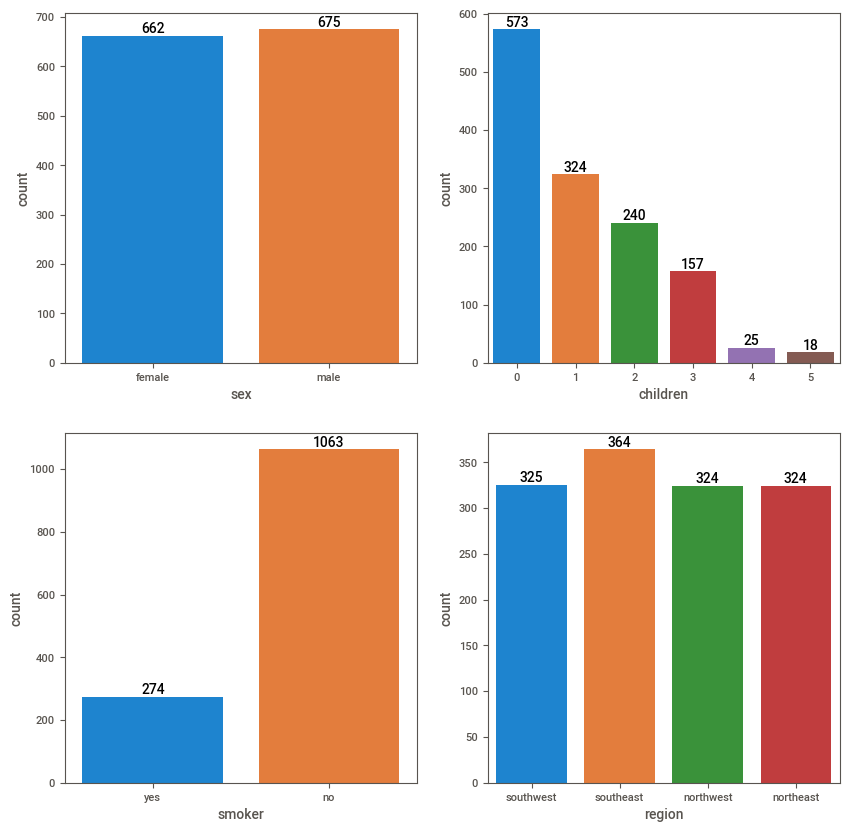

In [22]:
plt.figure(figsize=(10,10))
plot=1

for i in df1:
    plt.subplot(2,2,plot)
    ax=sns.countplot(x=df1[i])
    for j in ax.containers:
        ax.bar_label(j)
    plot+=1    
plt.show()

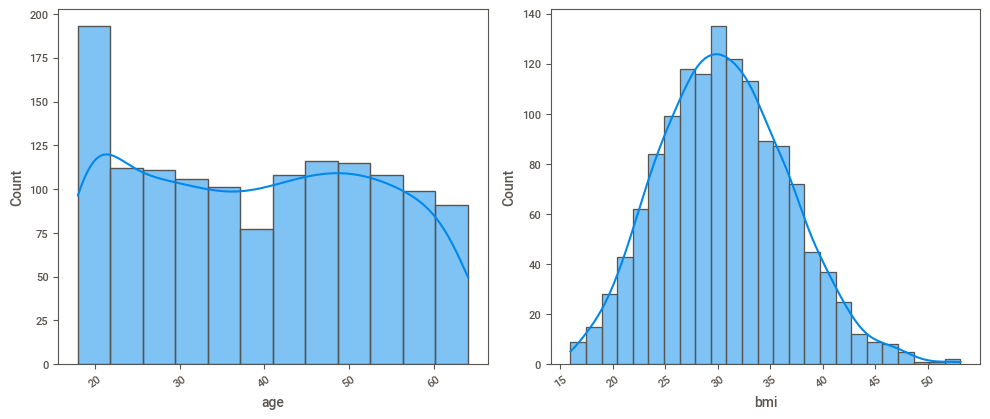

In [23]:
plt.figure(figsize=(10,8))
plot=1
for i in df2:
    plt.subplot(2,2,plot)
    sns.histplot(x=df2[i],kde=True)
    plt.xticks(rotation=35)
    plot+=1
plt.tight_layout()

Insights:
- Male and Female have almost equal ratio.
- Most of Majority Age People in between 18 to 23.
- Majority of People contains BMI is 25 to 37.
- Most of People having Childrens 0 and 1.
- 80% of People are Non-Smokers and 20% of are Smokers.
- Majority of People from Southeast Region.

## Bivariate Analysis:

<Axes: xlabel='age', ylabel='charges'>

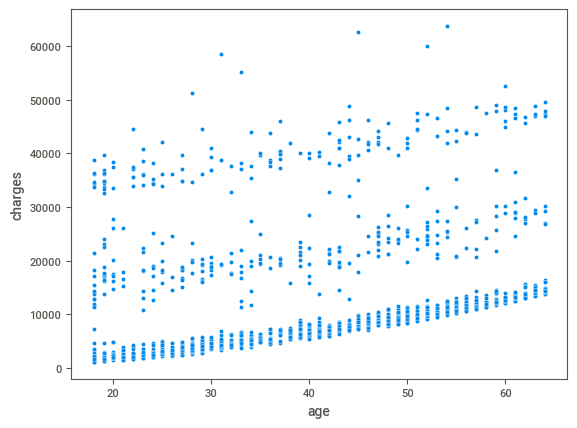

In [24]:
sns.scatterplot(x=df.age,y=df.charges)

<Axes: xlabel='bmi', ylabel='charges'>

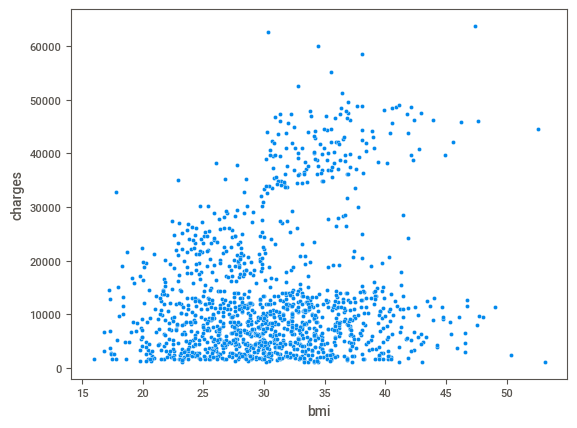

In [25]:
sns.scatterplot(x=df.bmi,y=df.charges)

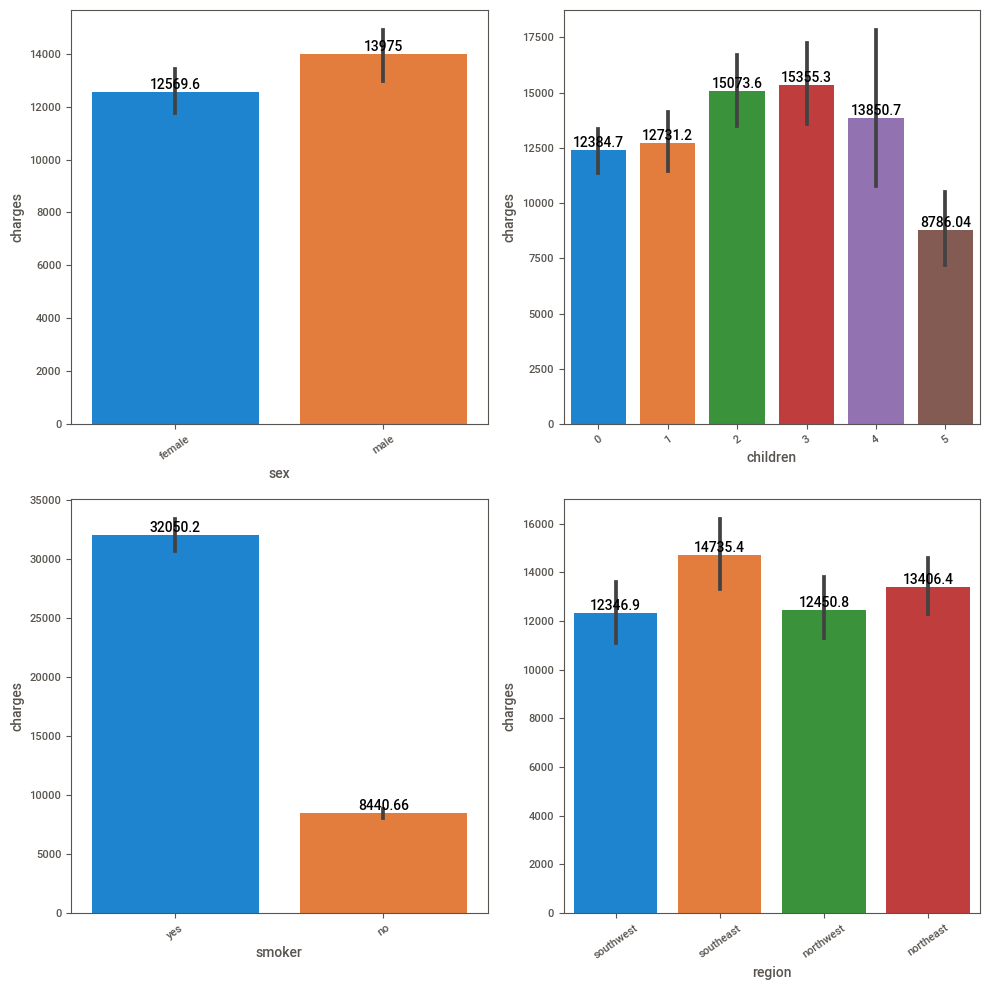

In [26]:
plt.figure(figsize=(10,10))
plotnumber=1

for i in df1:
    plt.subplot(2,2,plotnumber)
    ax=sns.barplot(x=df1[i],y=df.charges)
    plt.xticks(rotation=35)
    for j in ax.containers:
        ax.bar_label(j)
     
    plotnumber+=1
    
plt.tight_layout()

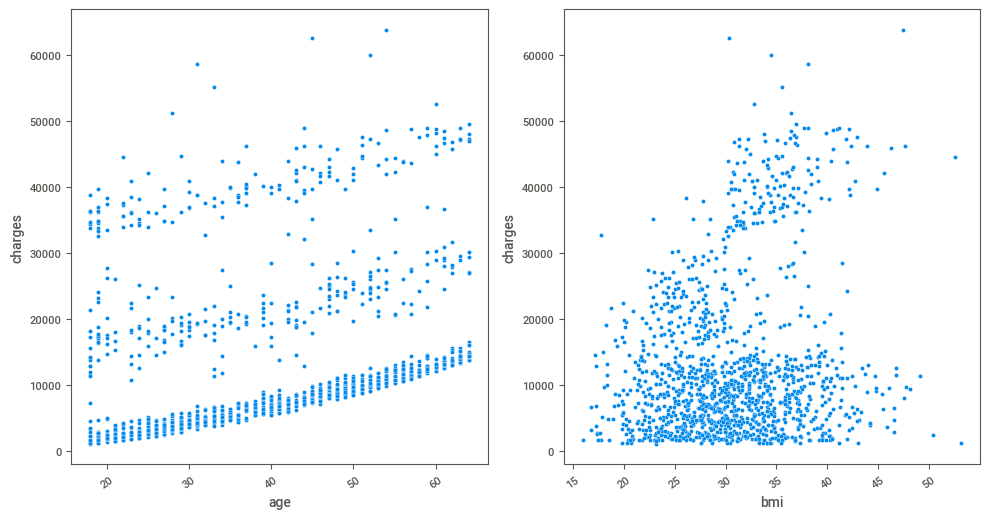

In [27]:
plt.figure(figsize=(10,10))
plotnumber=1

for i in df2:
    plt.subplot(2,2,plotnumber)
    sns.scatterplot(x=df2[i] ,y=df.charges)
    plt.xticks(rotation=35)
    plotnumber+=1
    
plt.tight_layout()

Insights:
- When the age increasing Charges also increasing.
- People who are having  more bmi,they are charging more.
- Male are paying More Charges.
- People who are having 2,3 childrens paying more charges.
- Smoking people in Southeast region  are paying more charges.
- We observed that Smokers-80%, age-30% are paying more charges.

# Data Preprocessing

### Handling with Null values:

In [28]:
df.isnull().sum() #No null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [29]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [30]:
np.where(df.age==0)

(array([], dtype=int64),)

In [31]:
np.where(df.bmi==0)

(array([], dtype=int64),)

In [32]:
np.where(df.charges==0)

(array([], dtype=int64),)

In [33]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [34]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

### Categorical to numerical

In [35]:
df.sex =df.sex.replace({'male':1,'female':0})
df.smoker=df.smoker.replace({'yes':1,'no':0})
df.region=df.region.replace({'southeast':3,'northeast':2,'southwest':1,'northwest':0})

In [36]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,3,1725.55230
2,28,1,33.000,3,0,3,4449.46200
3,33,1,22.705,0,0,0,21984.47061
4,32,1,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,10600.54830
1334,18,0,31.920,0,0,2,2205.98080
1335,18,0,36.850,0,0,3,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


<Axes: title={'center': 'correlation with charges'}>

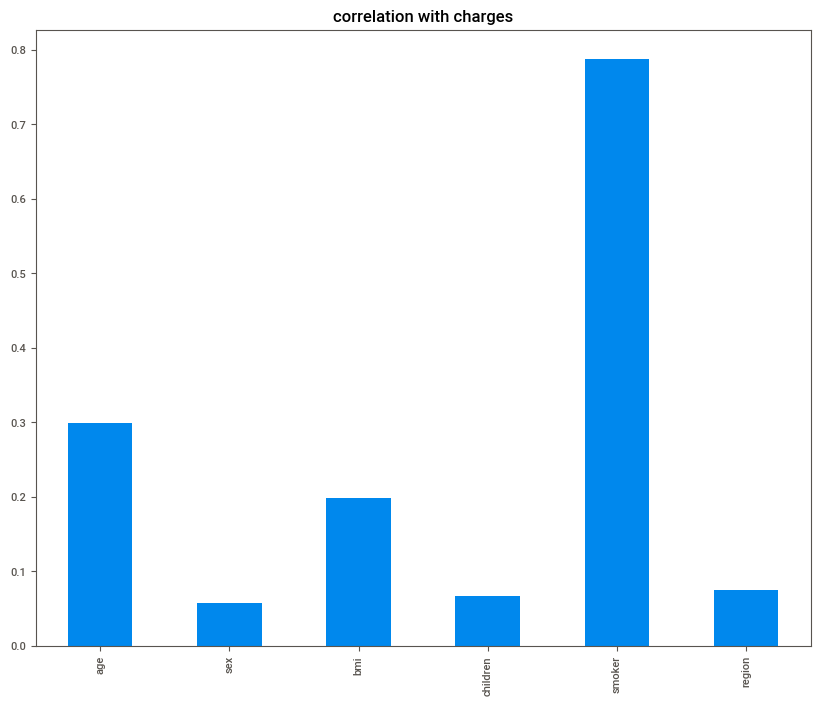

In [37]:
df3 = df.drop('charges',axis=1)
df3.corrwith(df['charges']).plot.bar(figsize =(10,8),title ='correlation with charges') 

Insights:
- We observes correlation between smoker,age and bmi with respect to charges.

### Handling with Outliers:

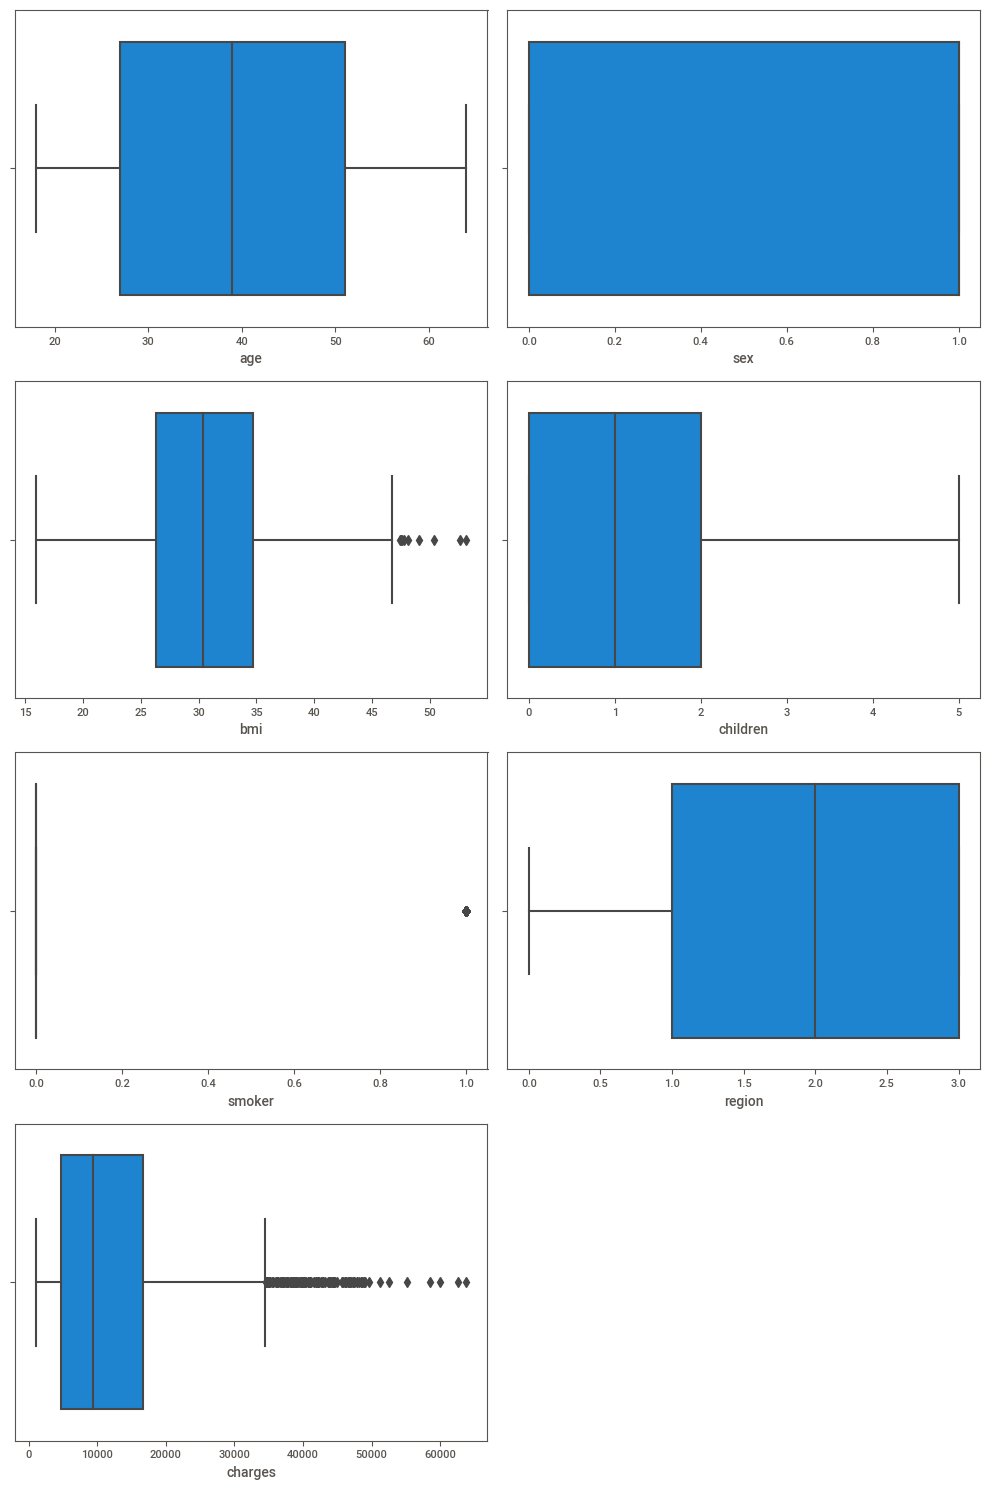

In [38]:
plt.figure(figsize=(10,15))
num=1
for i in df:
    plt.subplot(4,2,num)
    sns.boxplot(x=df[i])
    num+=1
    
plt.tight_layout()

In [ ]:
df.loc[df.bmi>45]

### Scaling

In [39]:
from sklearn.preprocessing import MinMaxScaler
MM= MinMaxScaler()

In [41]:
df[['age',"bmi"]]=MM.fit_transform(df[['age',"bmi"]])

In [42]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0,0.321227,0,1,1,16884.92400
1,0.000000,1,0.479150,1,0,3,1725.55230
2,0.217391,1,0.458434,3,0,3,4449.46200
3,0.326087,1,0.181464,0,0,0,21984.47061
4,0.304348,1,0.347592,0,0,0,3866.85520


### Feature Selection

In [43]:
df.drop('charges',axis=1).corr()

,age,sex,bmi,children,smoker,region
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,-0.009556
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.017818
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.211959
children,0.041536,0.017848,0.012755,1.000000,0.007331,-0.037177
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,0.068544
region,-0.009556,0.017818,0.211959,-0.037177,0.068544,1.000000


<Axes: >

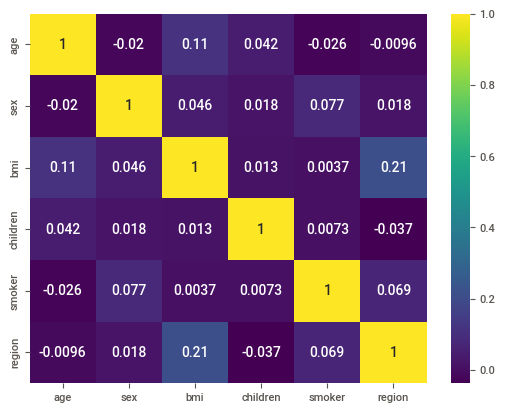

In [44]:

sns.heatmap(df.drop('charges',axis=1).corr(),annot=True,cmap='viridis')


- There is no co-relation between features/columns.

### Model Creation

In [45]:
x = df.drop('charges',axis=1)
x.head()

,age,sex,bmi,children,smoker,region
0,0.021739,0,0.321227,0,1,1
1,0.000000,1,0.479150,1,0,3
2,0.217391,1,0.458434,3,0,3
3,0.326087,1,0.181464,0,0,0
4,0.304348,1,0.347592,0,0,0


In [46]:
y = df.charges
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [48]:
x_train

,age,sex,bmi,children,smoker,region
763,0.195652,1,0.270917,0,0,2
1079,0.978261,1,0.476190,3,0,3
178,0.608696,0,0.348130,2,0,1
287,0.978261,0,0.276029,0,0,0
1290,0.434783,0,0.107345,2,0,2
...,...,...,...,...,...,...
1096,0.717391,0,0.511165,2,1,2
1131,0.195652,1,0.805488,2,0,1
1295,0.043478,1,0.162497,1,0,1
861,0.434783,0,0.323917,3,0,1


In [49]:
x_test

,age,sex,bmi,children,smoker,region
900,0.673913,1,0.176352,0,0,2
1064,0.239130,0,0.259349,4,0,1
1256,0.717391,0,0.549502,3,0,0
298,0.282609,1,0.495830,3,1,0
237,0.282609,1,0.603444,2,0,3
...,...,...,...,...,...,...
1014,0.434783,0,0.313156,0,0,1
669,0.478261,0,0.372612,1,0,3
1109,0.586957,1,0.118106,3,0,3
788,0.239130,1,0.176352,3,0,2


In [50]:
y_train

763      3070.8087
1079    15161.5344
178      8823.2790
287     14256.1928
1290     7133.9025
           ...    
1096    44641.1974
1131     3693.4280
1295     1964.7800
861      7151.0920
1127     5836.5204
Name: charges, Length: 1002, dtype: float64

In [51]:
y_test

900      8688.85885
1064     5708.86700
1256    11436.73815
298     38746.35510
237      4463.20510
           ...     
1014     5383.53600
669      6500.23590
1109     8605.36150
788      5209.57885
1192    13019.16105
Name: charges, Length: 335, dtype: float64

In [52]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1002, 6)
(335, 6)
(1002,)
(335,)


### Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [54]:
lr.fit(x_train,y_train)

LinearRegression()

In [55]:
print(np.asarray(lr.coef_))
print(lr.intercept_)

[ 1.13222816e+04 -1.17049068e+01  1.15543104e+04  5.28550690e+02
  2.30933865e+04 -7.55421006e+01]
-1834.6416077685699


In [56]:
y_pred = lr.predict(x_test)

In [57]:
y_pred

array([ 7670.42707747,  5908.11929507, 14222.63680522, 31761.44068444,
        9156.27889411, 13313.18852607, 29833.15722766,  1666.85508595,
       10738.23310604, 11326.66474231, 10343.89299789, 33159.37778158,
       30563.14533377, 17389.93420455, 10136.37124935,  9741.13423175,
        4395.82648146, 31960.18462941,  3510.28752665,  5411.67623164,
        3727.89649696, 29805.37490855, 14931.99014602, 30704.81054498,
       31034.13612105,  5453.59650465, 35584.35627567, 36743.95445803,
       10779.8614624 , 13613.74239388,  5909.44513564, 12894.00020367,
         743.4370244 , 12285.4748125 , 39669.28058161, 12410.7851391 ,
        4907.85570901,  3944.94234298, 31170.79427045,  9117.28802504,
        6411.0488727 , 29587.99998162, 34979.59673147, 11732.92231837,
        7354.57654949,  3609.95006429,  5574.15660189,  9105.03585007,
        4256.00766277,  9244.72625254,  6754.09032544, 11469.58913858,
       30683.64277824,  3818.77223144, 11209.76260299,  9962.5058264 ,
      

In [58]:
y_test.values

array([ 8688.85885 ,  5708.867   , 11436.73815 , 38746.3551  ,
        4463.2051  ,  9304.7019  , 38511.6283  ,  2150.469   ,
        7345.7266  , 10264.4421  , 13415.0381  , 24393.6224  ,
       37607.5277  , 13063.883   , 24915.04626 ,  8027.968   ,
        1980.07    , 38709.176   ,  3484.331   ,  3947.4131  ,
        1880.07    , 20773.62775 ,  9800.8882  , 21082.16    ,
       55135.40209 ,  3579.8287  , 43896.3763  , 52590.82939 ,
        9778.3472  , 10736.87075 ,  4347.02335 ,  9048.0273  ,
        1711.0268  , 12333.828   , 63770.42801 ,  9872.701   ,
        4687.797   ,  5693.4305  , 21195.818   ,  8233.0975  ,
        2755.02095 , 19798.05455 , 42124.5153  ,  9964.06    ,
        9193.8385  ,  3161.454   ,  2217.6012  ,  7337.748   ,
        4133.64165 ,  6338.0756  ,  4349.462   ,  5757.41345 ,
       21771.3423  ,  1391.5287  ,  7160.094   ,  7731.4271  ,
        9957.7216  ,  3594.17085 , 38282.7495  ,  7256.7231  ,
       10977.2063  ,  5245.2269  , 11187.6567  ,  1708.

### LR OF TESTING DATA

In [59]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [60]:
mse = mean_squared_error(y_test,y_pred)
mse

35548189.23800416

In [61]:
mae = mean_absolute_error(y_test,y_pred)
mae

4075.2190244859835

In [62]:
r2 = r2_score(y_test,y_pred)
r2

0.7944119638621229

In [63]:
adjusted_r2= 1-((1-r2)*(335-1))/(335-6-1)
adjusted_r2

0.7906512071035032

In [64]:
import math
rmse = math.sqrt(mse)
rmse

5962.230223498936

### LR OF TRAINING DATA

In [65]:
y_pred_train = lr.predict(x_train)


In [66]:
lr_r2_tr=r2_score(y_train,y_pred_train)
lr_r2_tr

0.7291356166421123

## By using bagging :
base estimator = Linear Regression

In [67]:
from sklearn.ensemble import BaggingRegressor
model_bag = BaggingRegressor(base_estimator=lr,random_state=42,n_estimators=50)
model_bag.fit(x_train,y_train)

BaggingRegressor(base_estimator=LinearRegression(), n_estimators=50,
                 random_state=42)

### Bagging of Testing

In [68]:
y_pred=model_bag.predict(x_test)
y_pred

array([ 7712.72558884,  5918.93366204, 14291.83219148, 31841.56317417,
        9066.290515  , 13289.24232957, 29657.62211728,  1564.99917803,
       10584.08273288, 11514.78954323, 10441.17075356, 33271.21650593,
       30501.7748054 , 17341.02653779, 10018.32263134,  9841.29273686,
        4367.95958254, 31855.51947951,  3565.47020219,  5234.25586267,
        3481.60453586, 29781.2486583 , 14792.71876059, 30740.53688188,
       30952.29777464,  5406.87476606, 35408.61585055, 36810.2130771 ,
       10717.38206606, 13691.71941996,  5759.94625916, 12851.89509399,
         647.81555235, 12415.69071934, 39458.83049222, 12391.57232398,
        4894.96324401,  4009.93870359, 31161.23494399,  9005.1983176 ,
        6193.90125071, 29551.12538744, 34942.89373706, 11764.78747802,
        7451.55399477,  3522.62641886,  5341.16709527,  9076.04229999,
        4242.18519068,  9207.698876  ,  6582.43801024, 11393.2129846 ,
       30601.5098085 ,  3664.85942335, 11269.90472558,  9949.68748753,
      

In [69]:
r2_bag_lr=r2_score(y_test,y_pred)
r2_bag_lr

0.7941291818865355

### Bagging of Training

In [70]:
y_pred1=model_bag.predict(x_train)
y_pred1

array([ 3299.46500938, 16154.96315799, 10070.17901421, ...,
         994.49694553,  8349.36595499,  9206.74950579])

In [71]:
r2_bag_lr_tr=r2_score(y_train,y_pred1)
r2_bag_lr_tr

0.7290583315124397

### Support Vector Machines

In [72]:
from sklearn.svm import SVR
sr = SVR(kernel='poly')

In [73]:
sr.fit(x_train,y_train)

SVR(kernel='poly')

### SVR TESTING DATA

In [74]:
y_pred_sr = sr.predict(x_test)
y_pred_sr

array([ 9250.08922803,  9503.46975651,  9383.53949506,  9572.76915424,
        9327.92890715,  9468.5288819 ,  9592.16036534,  9185.06553462,
        9295.92721814,  9382.33499432,  9186.16688159,  9207.82805135,
        9518.82919644,  9214.18023297,  9297.09901567,  9298.04028629,
        9195.26527523,  9769.33949728,  9241.41966202,  9221.68350465,
        9161.87607338,  9527.99344579,  9436.87362143,  9364.81059773,
        9190.26090398,  9219.45563916,  9960.55203513,  9312.04933338,
        9271.48967391,  9765.29297016,  9197.68335777,  9371.28240573,
        9182.7563976 ,  9258.5076424 ,  9644.76433685,  9232.17669604,
        9675.43792829,  9309.69651857,  9689.14450881,  9307.66496918,
        9182.73324923,  9668.50934398, 10410.59402085,  9302.02385687,
        9248.42086601,  9187.87639999,  9176.00665093,  9219.31287872,
        9191.79757296,  9383.86257728,  9281.27866656,  9232.24962975,
        9486.7654579 ,  9178.91451946,  9293.22433542,  9421.23467605,
      

In [75]:
mse=mean_squared_error(y_test,y_pred_sr)
mse

190336996.5632592

In [76]:
mae = mean_absolute_error(y_test,y_pred_sr)
mae

8845.320805825097

In [77]:
r2_sr =r2_score(y_test,y_pred_sr)
r2_sr

-0.10078769598727733

In [78]:
adjusted_r2_svr= 1-((1-r2_sr)*(335-1))/(335-6-1)
adjusted_r2_svr

-0.12092405627972735

### SVR TRAINING DATA

In [79]:
y_pred_svr=sr.predict(x_train)

In [80]:
r2_sr_tr=r2_score(y_train,y_pred_svr)
r2_sr_tr

-0.08192338251818576

- SVR model  is performing worse than a simple mean predictor.

### K_Nearest Neighbour

In [81]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

### KNN TESTING DATA

In [82]:
y_pred_knn = knn.predict(x_test)
y_pred_knn

array([ 8873.87071667, 17266.60935667, 12740.83101667, 31417.99958   ,
        4771.938     ,  8161.89323333, 25291.0485    ,  2067.60766667,
        7551.88813333, 10163.44633333, 18729.98459   , 26016.63713333,
       33761.20168333, 11273.014     , 12110.89605667,  7765.18166667,
        2387.854     , 33288.34816667,  6752.05428   ,  3964.6361    ,
        5127.03885   , 33761.20168333,  8879.9855    , 31267.90238   ,
       24058.79021667, 18333.84887   , 26710.89866667, 34573.89133333,
        9897.32298333, 15677.41036667,  4266.00038333,  9113.7068    ,
        2116.27083333, 10317.52866667, 44753.23563667,  9594.128     ,
        8449.77658333, 10466.14261667, 36344.97636333,  7454.86866667,
        2442.69641667, 25291.0485    , 26528.52446667,  9180.74225   ,
        8369.02886667,  8427.54339   ,  2442.69641667,  6774.49633333,
        4622.8641    , 12102.55072667,  4922.75196667,  5078.69228333,
       22009.912     ,  1136.96003333,  6807.701     , 13233.84386   ,
      

In [83]:
x_test

,age,sex,bmi,children,smoker,region
900,0.673913,1,0.176352,0,0,2
1064,0.239130,0,0.259349,4,0,1
1256,0.717391,0,0.549502,3,0,0
298,0.282609,1,0.495830,3,1,0
237,0.282609,1,0.603444,2,0,3
...,...,...,...,...,...,...
1014,0.434783,0,0.313156,0,0,1
669,0.478261,0,0.372612,1,0,3
1109,0.586957,1,0.118106,3,0,3
788,0.239130,1,0.176352,3,0,2


In [84]:
 mse=mean_squared_error(y_test,y_pred_knn)
mse

51923488.66729742

In [85]:
knn_r2 = r2_score(y_test,y_pred_knn)
knn_r2

0.6997076843192722

In [86]:
adjusted_r2_knn= 1-((1-knn_r2)*(335-1))/(335-6-1)
adjusted_r2_knn

0.6942145322031614

### KNN TRAINING DATA

In [87]:
y_knn_pred=knn.predict(x_train)

In [88]:
knn_r2_tr=r2_score(y_train,y_knn_pred)
knn_r2_tr

0.837666051715033

-  knn getting less of r2_score

### DECISION TREE

In [89]:
from sklearn.tree import DecisionTreeRegressor
dr =DecisionTreeRegressor(random_state=42)
dr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [90]:
y_pred_dr = dr.predict(x_test)
y_pred_dr

array([ 9361.3268 ,  6059.173  , 10848.1343 , 36837.467  ,  4266.1658 ,
        8978.1851 , 37484.4493 ,  2154.361  , 19144.57652, 10269.46   ,
       13012.20865, 23065.4207 , 36837.467  , 13470.86   ,  6082.405  ,
        8615.3    ,  2416.955  , 37742.5757 , 24671.66334,  4527.18295,
       23082.95533, 20984.0936 ,  8978.1851 , 20009.63365, 40273.6455 ,
       17128.42608, 42560.4304 , 43921.1837 ,  9583.8933 , 26392.26029,
        3761.292  ,  9058.7303 ,  2201.0971 , 13112.6048 , 48675.5177 ,
        9880.068  ,  4915.05985,  5312.16985, 22412.6485 ,  8240.5896 ,
        2217.46915, 19964.7463 , 40273.6455 ,  9290.1395 ,  7526.70645,
        3558.62025,  1759.338  ,  7727.2532 ,  4337.7352 , 23563.01618,
        5138.2567 ,  6474.013  , 23401.30575,  1880.487  ,  7729.64575,
        8219.2039 ,  9617.66245,  3208.787  , 40273.6455 ,  6710.1919 ,
       10381.4787 ,  5246.047  , 27322.73386,  1705.6245 , 20462.99766,
       12094.478  ,  4762.329  , 23065.4207 , 17178.6824 , 14235

In [91]:
mse=mean_squared_error(y_test,y_pred_dr)
mse

41688521.37417918

In [92]:
dr_r2=r2_score(y_test,y_pred_dr)
dr_r2

0.7589002021614475

In [93]:
adjusted_r2_dt= 1-((1-dr_r2)*(335-1))/(335-6-1)
adjusted_r2_dt

0.7544898400058642

### hyper parameter tuning for decision tree

In [94]:
from sklearn.model_selection import GridSearchCV


In [95]:
param_grid = {'max_depth': [None, 5, 10, 15, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(dr, param_grid, cv=5, scoring='r2')

In [96]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [97]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [98]:
DT =DecisionTreeRegressor(max_depth=5,min_samples_leaf=4,min_samples_split=2)

In [99]:
DT.fit(x_train,y_train)


DecisionTreeRegressor(max_depth=5, min_samples_leaf=4)

### DECISION TREE TESTING DATA

In [100]:
dr_gr_pred = DT.predict(x_test)
dr_gr_pred

array([11084.52579378,  7058.25987556, 11084.52579378, 41166.93146667,
        7058.25987556, 11084.52579378, 36110.266502  ,  1816.90990488,
        9362.06664   , 11084.52579378, 15263.30203308, 25798.42332583,
       41166.93146667, 13595.23617237,  7058.25987556,  9362.06664   ,
        5146.897646  , 41166.93146667,  7058.25987556,  5146.897646  ,
        3447.20657696, 20046.83846094, 11084.52579378, 20046.83846094,
       41166.93146667,  7058.25987556, 45628.26276125, 47359.195825  ,
       11084.52579378, 11084.52579378,  4404.18464862, 11084.52579378,
        5146.897646  , 16113.63755   , 44933.56753636, 11084.52579378,
        7058.25987556,  7058.25987556, 23317.16596684,  9362.06664   ,
        3447.20657696, 23317.16596684, 41166.93146667, 11084.52579378,
        9362.06664   ,  4404.18464862,  3447.20657696,  9362.06664   ,
        5146.897646  ,  7905.51486042,  7058.25987556,  6509.81028789,
       23317.16596684,  3447.20657696,  7905.51486042,  9362.06664   ,
      

In [101]:
mse=mean_squared_error(y_test,dr_gr_pred)
mse

19549486.280773804

In [102]:
dr_gr_r2 = r2_score(y_test,dr_gr_pred)
dr_gr_r2

0.8869382497921486

In [103]:
adjusted_r2_dt_hyp= 1-((1-dr_gr_r2)*(335-1))/(335-6-1)
adjusted_r2_dt_hyp

0.884870047044444

### DECISION TREE TRAINING DATA

In [104]:
y_pred_dt=DT.predict(x_train)

In [105]:
dt_r2_tr = r2_score(y_train,y_pred_dt)
dt_r2_tr

0.8666965101151599

In [106]:
# Graphical Representation For Decision tree

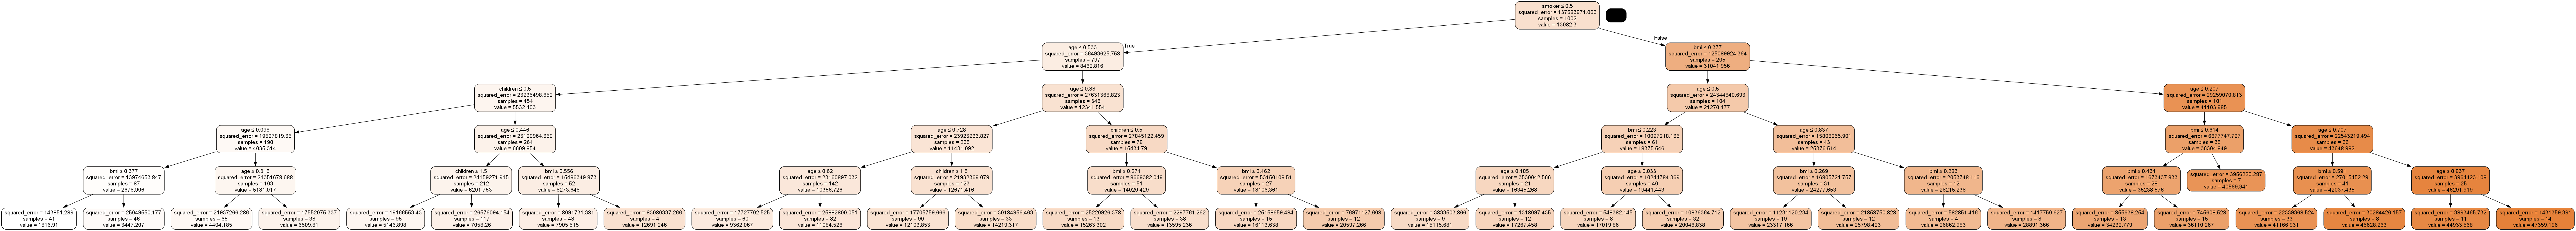

In [107]:
!pip install graphviz
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import pydotplus

# Assuming `DT` is your trained Decision Tree model and `df.columns[:-1]` are your feature names
feature_names = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
target_name = 'charges'

# Export the decision tree to a dot file
dot_data = export_graphviz(DT, out_file=None, feature_names=feature_names, class_names=[target_name], 
                           filled=True, rounded=True, special_characters=True)

# Create a graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the graph
Image(graph.create_png())


### Bagging Using Decision Tree

In [108]:
from sklearn.ensemble import BaggingRegressor
model1=BaggingRegressor(base_estimator=DT,n_estimators=100,random_state=42)
model1.fit(x_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=5,
                                                      min_samples_leaf=4),
                 n_estimators=100, random_state=42)

### Testing score of Bagging

In [109]:
y_pred =model1.predict(x_test)
y_pred

array([11144.83620471,  8289.03702653, 12012.46812802, 39957.86842635,
        5919.890847  , 10701.51561786, 37492.27802676,  2729.20247058,
        8685.66758603, 11466.93122615, 14937.28187678, 25543.16308727,
       40207.93206348, 14329.78360189,  6328.57718115,  9413.81669704,
        4448.00046152, 40491.23768204,  6618.52979882,  5347.26428739,
        3144.13918295, 19989.66803585, 11124.47546547, 20342.25504087,
       40536.75719011,  8664.15371806, 44200.70074336, 45638.85223784,
       11071.65516856, 10796.43387653,  4846.79217229, 10523.53634019,
        3783.40292372, 15213.43590769, 46806.77281043, 11000.09843114,
        8264.40579005,  6941.80673453, 25075.93779228, 10026.30763341,
        3142.83869815, 21650.28218713, 41665.87396293, 10703.99118342,
        9663.12872365,  4790.41646159,  3106.17388481,  8457.13639651,
        5566.02530124,  7696.08910475,  6062.78734705,  8306.51107547,
       22895.69722907,  3076.61822262,  7923.29840861,  9468.98034687,
      

In [110]:
DT_bagg=r2_score(y_test,y_pred)
DT_bagg

0.890769018453823

In [111]:
mse=mean_squared_error(y_test,y_pred,multioutput='uniform_average')
mse

18887108.781234436

### Training Score of Bagging

In [112]:
y_pred1 = model1.predict(x_train)
y_pred1

array([ 4461.92932321, 19638.44342098, 10000.96697999, ...,
        3939.70444149,  6933.63994371,  6205.76874335])

In [113]:
DT_bagg_tr=r2_score(y_train,y_pred1)
DT_bagg_tr

0.8760356703885518

In [114]:
mse = mean_squared_error(y_train,y_pred1,multioutput='uniform_average')
mse

17055504.73847974

### RANDOM FOREST

In [115]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)

In [116]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [117]:
rf_pred = rf.predict(x_test)
rf_pred

array([ 9389.0491259, 10504.6164629, 11864.8699214, 43221.0062948,
        5458.8479772,  9697.5399478, 37837.3199156,  2415.128509 ,
       10806.780796 , 10553.8086323, 13695.4312722, 24641.1090351,
       43222.637538 , 15045.7568521,  6035.8320618,  9093.9273103,
       11096.4346953, 39215.117662 ,  6436.4003314,  4397.4023535,
        9073.2834545, 20324.4443475, 10641.6657426, 21426.1075114,
       39604.5142743, 18959.1239748, 43332.0622044, 45921.352156 ,
       10642.3411031, 12567.0445032,  4000.8076876,  9339.0401561,
        3266.0679819, 13826.7492156, 47193.5968921, 10325.1623822,
       11616.1444928,  5602.7687245, 24542.1139532,  8613.5959554,
        2837.929717 , 20350.7393099, 41490.6479168,  9494.5338925,
        8962.9131301,  4069.408056 ,  3132.824495 ,  8272.8368873,
        6464.1153669, 12590.6794753,  5130.1811469,  7182.4686555,
       21932.3722738,  5618.7702613,  7840.670017 , 11796.4019143,
       11635.5620446,  4950.4034192, 40163.5422701,  7292.6082

In [118]:
mse=mean_squared_error(y_test,rf_pred)
mse

22448871.454738937

In [119]:
rf_r2 = r2_score(y_test,rf_pred)
rf_r2

0.8701700566239433

In [120]:
adjusted_r2_rf= 1-((1-rf_r2)*(335-1))/(335-6-1)
adjusted_r2_rf

0.867795118635357

### Hyper parameter tuning for Random Forest

In [121]:
from sklearn.model_selection import RandomizedSearchCV

In [122]:
from scipy.stats import randint

In [123]:
random_grid = {'n_estimators': randint(50, 200),  
    'max_features': ['auto', 'sqrt'],  
    'max_depth': [100,200],  
    'min_samples_split': randint(2, 20),  
    'min_samples_leaf': randint(1, 20)}

In [124]:
rf1 =RandomizedSearchCV(rf,param_distributions=random_grid,scoring='r2',cv=5)

In [125]:
rf1.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [100, 200],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C5F087DAD0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C5F087ED50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C5F087DC10>},
                   scoring='r2')

In [126]:
rf1.best_params_

{'max_depth': 200,
 'max_features': 'auto',
 'min_samples_leaf': 9,
 'min_samples_split': 3,
 'n_estimators': 146}

In [127]:
RF=RandomForestRegressor(max_depth=200,max_features='auto',min_samples_leaf=18,min_samples_split=4,n_estimators=85)
RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=200, max_features='auto', min_samples_leaf=18,
                      min_samples_split=4, n_estimators=85)

### RANDOM FOREST TESTING DATA

In [128]:
y_RF_pred=RF.predict(x_test)
y_RF_pred

array([11252.45845861,  6555.60835446, 11710.71941596, 41009.34655701,
        5810.3740873 , 10663.07279167, 37068.00019427,  2358.26387665,
        9055.3810043 , 11809.4479639 , 14959.41961971, 25524.61314541,
       41053.91690403, 15371.9501639 ,  6527.48358499,  9843.37849545,
        4586.70539624, 41622.8667042 ,  7593.17752729,  5432.62563764,
        4045.3970996 , 19412.74901205, 11367.17800261, 19621.49185715,
       41644.24718132,  8010.6402209 , 42535.7759729 , 44367.38061422,
       11057.87616208, 10629.70287126,  4589.90354908, 10160.77528166,
        3661.52400823, 15351.09998834, 45575.15956303, 10731.43119199,
        7281.49739835,  7130.65595455, 25493.08706096, 10289.24101018,
        3168.25846432, 24243.75600579, 43049.78719197, 10054.35268805,
       10332.91483373,  4737.10025846,  3016.1773523 ,  8788.69858963,
        5652.30371317,  8022.28243464,  5998.65088977,  7461.71174825,
       24522.15887147,  3875.9402613 ,  8421.98763723,  9397.70489557,
      

In [129]:
mse=mean_squared_error(y_test,y_RF_pred)
mse

19816970.438547213

In [130]:
RF_r2=r2_score(y_test,y_RF_pred)
RF_r2

0.8853912921587669

In [131]:
adjusted_r2_rf_hyp= 1-((1-RF_r2)*(335-1))/(335-6-1)
adjusted_r2_rf_hyp

0.8832947914055735

### RANDOM FOREST TRAINING DATA

In [132]:
y_pred_rf =RF.predict(x_train)
y_pred_rf

array([ 3828.44974197, 16513.11583237, 10363.83347839, ...,
        3230.39429483,  7114.76705259,  6219.23612098])

In [133]:
RF_r2_tr=r2_score(y_train,y_pred_rf)
RF_r2_tr

0.8678254040081065

### Bagging using Random Forest

In [134]:
from sklearn.ensemble import BaggingRegressor
model2=BaggingRegressor(base_estimator=RF,n_estimators=100,random_state=42)
model2.fit(x_train,y_train)

BaggingRegressor(base_estimator=RandomForestRegressor(max_depth=200,
                                                      max_features='auto',
                                                      min_samples_leaf=18,
                                                      min_samples_split=4,
                                                      n_estimators=85),
                 n_estimators=100, random_state=42)

### Testing Score of Bagging

In [135]:
y_pred=model2.predict(x_test)
y_pred

array([11246.18591964,  6912.9651944 , 11973.82112427, 39440.43457356,
        6281.73310539, 11293.43620227, 38674.91875212,  2873.72963194,
        8749.86780935, 11721.87184239, 15141.67304291, 24414.25762021,
       39456.6022014 , 15242.99775272,  6953.91632361,  9587.60952344,
        4465.08642551, 40350.67523482,  6861.40186432,  5323.10937586,
        3575.30242169, 19303.01119292, 11655.48820551, 21082.83016597,
       39854.05224479,  6667.72604945, 41818.6681733 , 43474.00571699,
       11010.14558356, 11125.45067245,  4871.27561297, 10792.6002164 ,
        3765.17322798, 14490.73578068, 43812.72879852, 10913.37830608,
        6252.12638096,  7312.11726765, 24318.81003409,  9776.15152772,
        3384.69008459, 24007.97046035, 42679.13339751, 10560.52048126,
       10135.91527747,  4726.86845668,  3144.79690982,  8366.94922914,
        5556.10304027,  7929.05937737,  6725.43476668,  7372.25499764,
       24039.74262515,  3364.24994884,  8298.3742898 ,  9480.52938855,
      

In [136]:
RF_bagg =r2_score(y_test,y_pred)
RF_bagg

0.8856507987687957

In [137]:
mse=mean_squared_error(y_test,y_pred,multioutput='uniform_average')
mse

19772099.198687557

### Training Score of Bagging

In [138]:
y_pred1=model2.predict(x_train)
y_pred1

array([ 4164.63277212, 15717.4147502 , 10104.17239161, ...,
        3691.30082307,  7399.06040399,  6798.37369036])

In [139]:
mse=mean_squared_error(y_train,y_pred1)
mse

19450755.08149954

In [140]:
RF_bagg_tr =r2_score(y_train,y_pred1)
RF_bagg_tr

0.8586262997732024

### GRADIENT BOOSTING

In [141]:
from sklearn.ensemble import GradientBoostingRegressor

In [142]:
gr = GradientBoostingRegressor(loss='squared_error',
    n_estimators=100,
    criterion='friedman_mse',
    min_samples_split=4,
    min_samples_leaf=1,
    max_depth=3,
                               
)
gr.fit(x_train,y_train)

GradientBoostingRegressor(min_samples_split=4)

### TESTING DATA FOR GB

In [143]:
y_gr_prd = gr.predict(x_test)
y_gr_prd

array([10088.56159745,  7949.07724613, 12701.12508428, 38893.08767985,
        6660.61483008, 11465.77520551, 39886.99670733,  5270.2025109 ,
       10066.17535547, 11159.08672818, 13647.17843399, 25037.47764975,
       39097.4062827 , 14620.88770939,  9354.09776476,  8646.79532274,
        4386.76800006, 39660.47649911,  5373.46683575,  6152.25150691,
        3725.49160107, 19889.28504743, 10103.57304916, 20889.31967644,
       39395.96414151,  6993.04801524, 43577.34758234, 44704.85877596,
       11417.25071797, 13867.41695182,  4857.62139779, 10577.81236446,
        3347.59034989, 15469.5060595 , 46392.02675633, 10938.7483536 ,
        6548.24554717,  5699.67742996, 22032.32428433,  9560.91698031,
        3172.19463082, 21498.51368117, 41911.40534781, 10837.20261031,
        8304.45422902,  4399.86105448,  4003.3262683 ,  8765.77600946,
        5455.38423803,  7842.50712749,  7094.66070112,  6350.76169897,
       23928.03380775,  3449.84533797,  8548.89950028,  9429.52808834,
      

In [144]:
mse=mean_squared_error(y_test,y_gr_prd)
mse

20305300.76528793

In [145]:
gr_r2 = r2_score(y_test,y_gr_prd)
gr_r2

0.8825671012502223

In [146]:
adjusted_r2_gb= 1-((1-gr_r2)*(335-1))/(335-6-1)
adjusted_r2_gb

0.8804189384682142

### TRAINING DATA FOR GB

In [147]:
y_gr_prd_tr = gr.predict(x_train)
y_gr_prd_tr

array([ 4133.01521341, 17011.06450065,  9027.38512314, ...,
        2771.34592664,  7839.79883191,  7646.2264642 ])

In [148]:
r2_gr_tr = r2_score(y_train,y_gr_prd_tr)
r2_gr_tr

0.8946711612908453

In [149]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

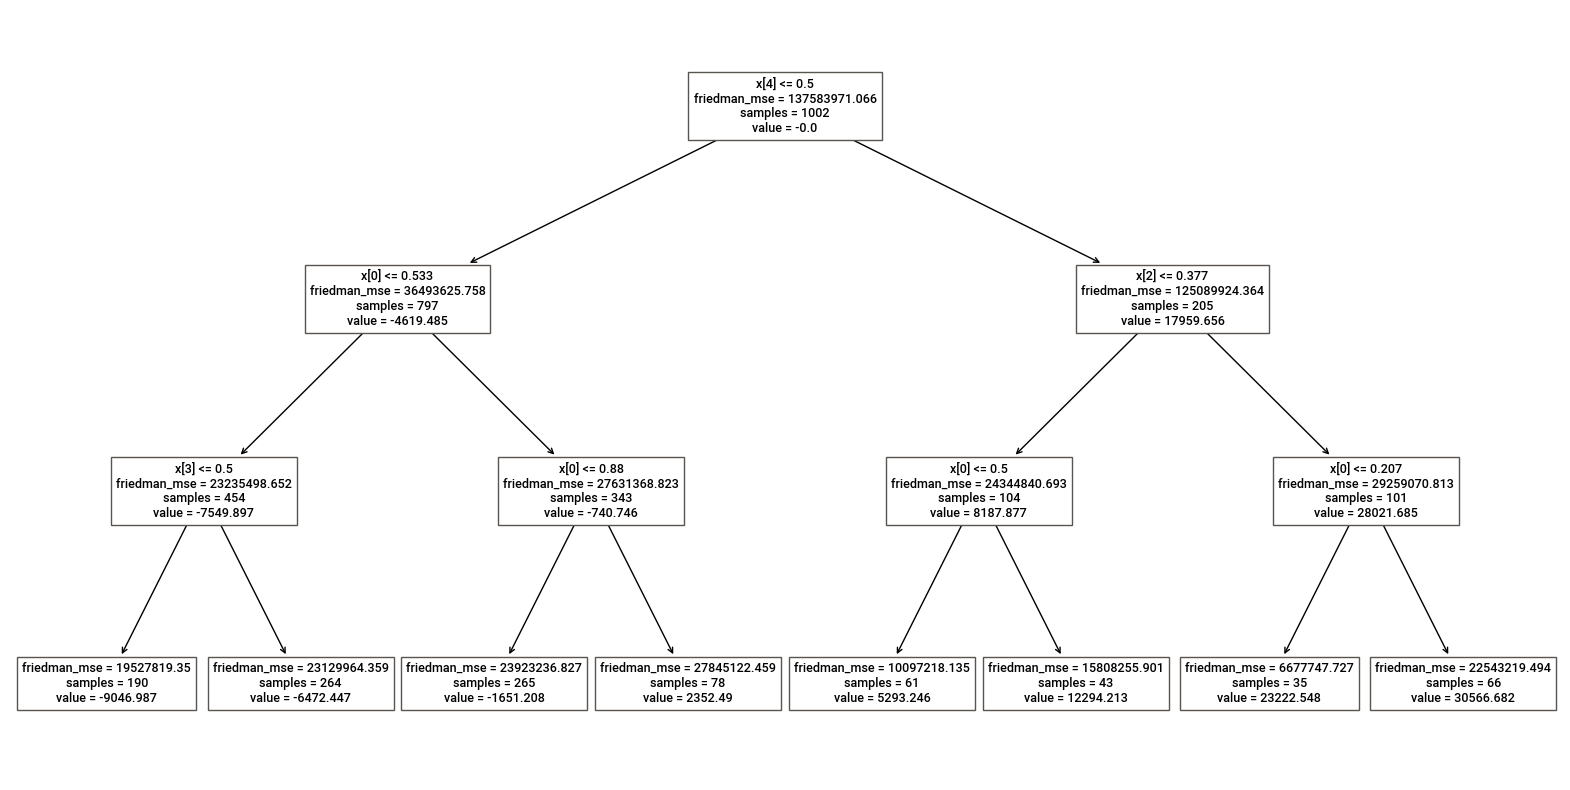

In [150]:
from sklearn.tree import plot_tree
import pickle
save_xgb=pickle.dumps(gr)
model = pickle.loads(save_xgb)
model.predict(x_test)
plt.figure(figsize=(20,10))
plot_tree(gr.estimators_[0,0])
plt.show()


### Neural Networks[MLP Regressor]

In [151]:
from sklearn.neural_network import MLPRegressor
neural =MLPRegressor( hidden_layer_sizes=(50,3),
                       learning_rate_init=0.1,
                       max_iter=100,
                       activation='relu',
                     solver='adam',
                       random_state=42)
neural.fit(x_train,y_train)

MLPRegressor(hidden_layer_sizes=(50, 3), learning_rate_init=0.1, max_iter=100,
             random_state=42)

#### Testing data of MLP Regressor

In [152]:
y_pred = neural.predict(x_test)
y_pred

array([ 6870.64654978,  6674.23685805, 12439.07596132, 29293.66408284,
        7715.01504534, 11026.07457304, 26675.57381695,  1819.97403489,
        8505.96543707, 10675.46102221,  9600.33035384, 30707.0978235 ,
       27637.32364096, 14399.60324699,  8388.96933562,  8899.50825346,
        4117.64669332, 28544.92500129,  4347.73138227,  4727.84540493,
        2951.54715657, 27259.75214564, 11918.49923343, 28294.03449832,
       28170.18862124,  5203.43664186, 31337.09606687, 33353.18093638,
        9042.73339349, 12274.40662793,  4648.06835737, 10557.90246963,
        2172.08701009, 11022.01150571, 34461.20652742, 10560.84058316,
        6308.19924781,  5111.73529824, 28531.27042655,  7539.87808295,
        4622.82811895, 27333.68014256, 31317.44476901, 10028.38715437,
        7348.15943205,  3219.54872568,  3918.02368651,  7852.13282186,
        4232.06199506,  8075.35751734,  5971.58983236,  9183.03083175,
       27965.22223124,  3283.57054613,  9720.35884617,  8715.97520349,
      

In [153]:
MLP_r2 =r2_score(y_test,y_pred)
MLP_r2

0.7498783724478624

#### Training Data of MLP Regressor

In [154]:
y_pred1 = neural.predict(x_train)
y_pred1

array([ 3233.63521724, 13796.61770508,  8904.05466651, ...,
        2228.4090754 ,  8006.80259176,  7763.8629792 ])

In [155]:
MLP_r2_tr=r2_score(y_train,y_pred1)
MLP_r2_tr

0.7089684669952778

# Overall performance of  Regression models

In [156]:
models =pd.DataFrame ({
    'Models':['Linear Regression MODEL','Linear Regression_Bagging Model','SVR MODEL','KNN MODEL','Decision Tree MODEL',
              'Decision Tree_Bagging MODEL','Random Forest Model','Random Forest_Bagging Model','GB Model','MLP Regressor'],
      'Training(R2)':[lr_r2_tr,r2_bag_lr_tr,r2_sr_tr,knn_r2_tr,dt_r2_tr,DT_bagg,RF_r2_tr,RF_bagg_tr,r2_gr_tr,MLP_r2_tr],
       'Testing(R2)':[r2,r2_bag_lr,r2_sr,knn_r2,dr_gr_r2,DT_bagg,RF_r2,RF_bagg,gr_r2,MLP_r2]})

In [157]:
Models=['Linear Regression MODEL','Linear Regression_Bagging Model','SVR MODEL','KNN MODEL','Decision Tree MODEL',
              'Decision Tree_Bagging MODEL','Random Forest Model','Random Forest_Bagging Model','GB Model','MLP Regressor']
testing_r2=[r2*100,r2_bag_lr*100,r2_sr,knn_r2*100,dr_gr_r2*100,DT_bagg*100,RF_r2*100,RF_bagg*100,gr_r2*100,MLP_r2*100]

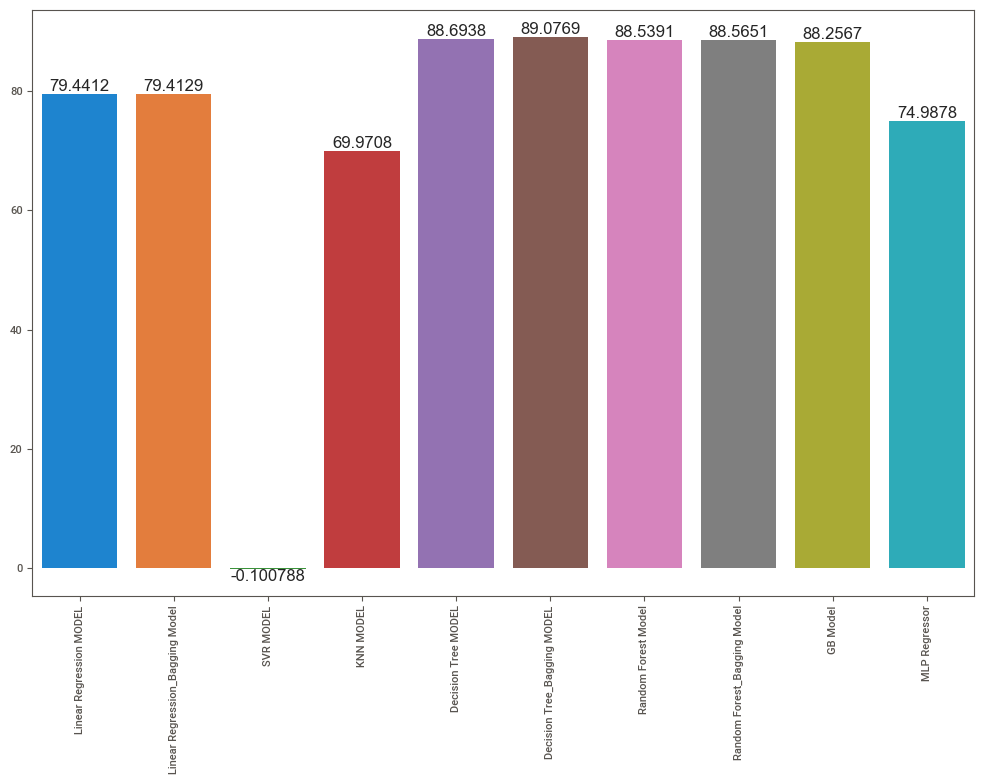

In [158]:
plt.figure(figsize=(10,8))
ax=sns.barplot(x=Models, y=testing_r2)
sns.set_theme(style="darkgrid")
plt.xticks(rotation=90)
for j in ax.containers:
        ax.bar_label(j)
plt.tight_layout()

In [159]:
models

,Models,Training(R2),Testing(R2)
0,Linear Regression MODEL,0.729136,0.794412
1,Linear Regression_Bagging Model,0.729058,0.794129
2,SVR MODEL,-0.081923,-0.100788
3,KNN MODEL,0.837666,0.699708
4,Decision Tree MODEL,0.866697,0.886938
5,Decision Tree_Bagging MODEL,0.890769,0.890769
6,Random Forest Model,0.867825,0.885391
7,Random Forest_Bagging Model,0.858626,0.885651
8,GB Model,0.894671,0.882567
9,MLP Regressor,0.708968,0.749878


# Insights of Regression model:
 
 - 1.Linear Regression:
        - The model is Overfitting.  
        
   1.1.Linear Regression_Bagging Model:
        - The model is Overfitting.
        
- 2.Support Vector Regression:
    - having the negative co_relation.
    
- 3.KNN:
    --The model is  generalization(Under-fitting).
    
- 4.Decision Tree:
    -The model is  generalization(Over-fitting).
    
  4.1 Decision Tree_Bagging MODEL:
    -The model is  generalization(Over-fitting).
  
- 5.Random Forest:
    -The model is  generalization(Over-fitting).  
    
  5.1 Random Forest_Bagging Model:
    -The model is  generalization(Over-fitting). 
- 6.GB:
    - The model is generalization.
- 7.MLP Regressor:
    -The model is  generalization(Over-fitting).

## Validating Using Random Data
#### we did scaling ,so that is rhe reason we have to provide same type of values..

In [166]:
checking_data=([[0.673913,1,0.176352,0,0,2]])
check_arry=np.asanyarray(checking_data)
checking_LR_prediction=lr.predict(check_arry)
checking_LR_Bagging_prediction=model_bag.predict(check_arry)
checking_DT_prediction=DT.predict(check_arry)
checking_DT_Bagging_prediction=model1.predict(check_arry)
checking_GD_prediction=gr.predict(check_arry)
checking_RF_prediction=RF.predict(check_arry)
checking_RF_Bagging_prediction=model2.predict(check_arry)
checking_MLP_prediction=neural.predict(check_arry)


print("Based on Random data: ","Predited_Insurence_Price_Linear_Regression:",checking_LR_prediction)
print("Based on Random data ","Predited_Insurence_Price_Linear_Regression_Bagging:",checking_LR_Bagging_prediction)

print("Based on Random data ","Predited_Insurence_Price_Desion_Tree:",checking_DT_prediction)
print("Based on Random data ","Predited_Insurence_Price_Desion_Tree_Bagging:",checking_DT_Bagging_prediction)

print("Based on Random data ","Predited_Insurence_Price_Gradient_Boosting:",checking_GD_prediction)
print("Based on Random data ","Predited_Insurence_Price_Random_Forest:",checking_RF_prediction)
print("Based on Random data ","Predited_Insurence_Price_Random_Forest_Bagging:",checking_RF_Bagging_prediction)

print("Based on Random data ","Predited_Insurence_Price_MLP_Regressor:",checking_MLP_prediction)



Based on Random data:  Predited_Insurence_Price_Linear_Regression: [7670.42777886]
Based on Random data  Predited_Insurence_Price_Linear_Regression_Bagging: [7712.72626728]
Based on Random data  Predited_Insurence_Price_Desion_Tree: [11084.52579378]
Based on Random data  Predited_Insurence_Price_Desion_Tree_Bagging: [11144.83620471]
Based on Random data  Predited_Insurence_Price_Gradient_Boosting: [10088.56159745]
Based on Random data  Predited_Insurence_Price_Random_Forest: [11252.45845861]
Based on Random data  Predited_Insurence_Price_Random_Forest_Bagging: [11246.18591964]
Based on Random data  Predited_Insurence_Price_MLP_Regressor: [6870.64697027]


In [165]:
checking_data=([[0.282609,1,0.495830,3,1,0]])
check_arry=np.asanyarray(checking_data)
checking_LR_prediction=lr.predict(check_arry)
checking_LR_Bagging_prediction=model_bag.predict(check_arry)
checking_DT_prediction=DT.predict(check_arry)
checking_DT_Bagging_prediction=model1.predict(check_arry)
checking_GD_prediction=gr.predict(check_arry)
checking_RF_prediction=RF.predict(check_arry)
checking_RF_Bagging_prediction=model2.predict(check_arry)
checking_MLP_prediction=neural.predict(check_arry)


print("Based on Random data: ","Predited_Insurence_Price_Linear_Regression:",checking_LR_prediction)
print("Based on Random data ","Predited_Insurence_Price_Linear_Regression_Bagging:",checking_LR_Bagging_prediction)

print("Based on Random data ","Predited_Insurence_Price_Desion_Tree:",checking_DT_prediction)
print("Based on Random data ","Predited_Insurence_Price_Desion_Tree_Bagging:",checking_DT_Bagging_prediction)

print("Based on Random data ","Predited_Insurence_Price_Gradient_Boosting:",checking_GD_prediction)
print("Based on Random data ","Predited_Insurence_Price_Random_Forest:",checking_RF_prediction)
print("Based on Random data ","Predited_Insurence_Price_Random_Forest_Bagging:",checking_RF_Bagging_prediction)

print("Based on Random data ","Predited_Insurence_Price_MLP_Regressor:",checking_MLP_prediction)


Based on Random data:  Predited_Insurence_Price_Linear_Regression: [31761.44447229]
Based on Random data  Predited_Insurence_Price_Linear_Regression_Bagging: [31841.56700594]
Based on Random data  Predited_Insurence_Price_Desion_Tree: [41166.93146667]
Based on Random data  Predited_Insurence_Price_Desion_Tree_Bagging: [39990.44468785]
Based on Random data  Predited_Insurence_Price_Gradient_Boosting: [38893.08767985]
Based on Random data  Predited_Insurence_Price_Random_Forest: [41009.34655701]
Based on Random data  Predited_Insurence_Price_Random_Forest_Bagging: [39444.74086295]
Based on Random data  Predited_Insurence_Price_MLP_Regressor: [29293.66738818]


### CHECKING WITH OWN DATA SET:

In [162]:
checking_data=(x_test)
check_arry=np.asanyarray(checking_data)
checking_LR_prediction=lr.predict(check_arry)
checking_LR_Bagging_prediction=model_bag.predict(check_arry)
checking_DT_prediction=DT.predict(check_arry)
checking_DT_Bagging_prediction=model1.predict(check_arry)
checking_GD_prediction=gr.predict(check_arry)
checking_RF_prediction=RF.predict(check_arry)
checking_RF_Bagging_prediction=model2.predict(check_arry)
checking_MLP_prediction=neural.predict(check_arry)


print("Based on Random data ","Predited_Insurence_Price_Linear_Regression:",checking_LR_prediction)
print("Based on Random data ","Predited_Insurence_Price_Linear_Regression_Bagging:",checking_LR_Bagging_prediction)

print("Based on Random data ","Predited_Insurence_Price_Desion_Tree:",checking_DT_prediction)
print("Based on Random data ","Predited_Insurence_Price_Desion_Tree_Bagging:",checking_DT_Bagging_prediction)

print("Based on Random data ","Predited_Insurence_Price_Gradient_Boosting:",checking_GD_prediction)
print("Based on Random data ","Predited_Insurence_Price_Random_Forest:",checking_RF_prediction)
print("Based on Random data ","Predited_Insurence_Price_Random_Forest_Bagging:",checking_RF_Bagging_prediction)

print("Based on Random data ","Predited_Insurence_Price_MLP_Regressor:",checking_MLP_prediction)


Based on Random data  Predited_Insurence_Price_Linear_Regression: [ 7670.42707747  5908.11929507 14222.63680522 31761.44068444
  9156.27889411 13313.18852607 29833.15722766  1666.85508595
 10738.23310604 11326.66474231 10343.89299789 33159.37778158
 30563.14533377 17389.93420455 10136.37124935  9741.13423175
  4395.82648146 31960.18462941  3510.28752665  5411.67623164
  3727.89649696 29805.37490855 14931.99014602 30704.81054498
 31034.13612105  5453.59650465 35584.35627567 36743.95445803
 10779.8614624  13613.74239388  5909.44513564 12894.00020367
   743.4370244  12285.4748125  39669.28058161 12410.7851391
  4907.85570901  3944.94234298 31170.79427045  9117.28802504
  6411.0488727  29587.99998162 34979.59673147 11732.92231837
  7354.57654949  3609.95006429  5574.15660189  9105.03585007
  4256.00766277  9244.72625254  6754.09032544 11469.58913858
 30683.64277824  3818.77223144 11209.76260299  9962.5058264
 10315.44436634  2454.48953063 31392.74269674  9419.63741726
 15612.96250822  8324

In [163]:
y_test

900      8688.85885
1064     5708.86700
1256    11436.73815
298     38746.35510
237      4463.20510
           ...     
1014     5383.53600
669      6500.23590
1109     8605.36150
788      5209.57885
1192    13019.16105
Name: charges, Length: 335, dtype: float64

In [164]:
x_test

,age,sex,bmi,children,smoker,region
900,0.673913,1,0.176352,0,0,2
1064,0.239130,0,0.259349,4,0,1
1256,0.717391,0,0.549502,3,0,0
298,0.282609,1,0.495830,3,1,0
237,0.282609,1,0.603444,2,0,3
...,...,...,...,...,...,...
1014,0.434783,0,0.313156,0,0,1
669,0.478261,0,0.372612,1,0,3
1109,0.586957,1,0.118106,3,0,3
788,0.239130,1,0.176352,3,0,2


### Conclusion
    We have performed 7 models in regression process. 
    Conclusively, Gradient Boosting the model outperformed the other models.
### Based on the smokers category insurance charges tend to more increase. 
    As the age of an individual increases, insurance charges also tend to increase, particularly for smokers.
    with an increase in BMI levels we also see that,insurance charges also increases,particulary for smokers.
    Individuals with less children are more inclined to option for insurance.
    Insurance prices seams higher in the Southeast region.
    We observes correlation between age,bmi,smoker and region category with respect to charges.
